# Checking outputs are correct
7th October 2024

In [365]:
import sys
sys.path.append('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm')

In [602]:
import numpy as np
import xarray as xr
import glob

import scipy as sp
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cf
import matplotlib.ticker as mticker
import utils.areal_plots as aplot,
import utils.prob_plots as pplot
from models import moe

ModuleNotFoundError: No module named 'seasonal_means'

In [362]:
%load_ext autoreload
%autoreload 2

# Raw models differences

In [300]:
hist_rcm_list = []

for file in sorted(glob.glob('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/historical*2005.csv')):

    # Load data
    print(file)
    df = pd.read_csv(file, index_col=0)
    df['time'] = pd.to_datetime(df['time'])
    df['month'] = df['time'].dt.month

    # Aggregate data by month
    agg_df = pd.DataFrame()
    group = df.groupby(['lat', 'lon', 'month'])
    agg_df['mean'] = group.mean()['tp']
    hist_rcm_list.append(agg_df)

/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/historical_CSIRO_1976_2005.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/historical_MIROC_1976_2005.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/historical_MPI_IITM_1976_2005.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/historical_MPI_REMO2009_1976_2005.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/historical_NOAA_SMHI_1976_2005.csv


In [301]:
hist_rcm_df = pd.concat(hist_rcm_list, axis=1)
hist_rcm_df['means']  = hist_rcm_df.mean(axis=1)

In [302]:
rcp45_rcm_list = []

for file in sorted(glob.glob('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/rcp45*95.csv')):

    # Load data
    print(file)
    df = pd.read_csv(file, index_col=0)
    df['time'] = pd.to_datetime(df['time'])
    df['month'] = df['time'].dt.month

    # Aggregate data by month
    agg_df = pd.DataFrame()
    group = df.groupby(['lat', 'lon', 'month'])
    agg_df['mean'] = group.mean()['tp']
    rcp45_rcm_list.append(agg_df)

/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/rcp45_CSIRO_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/rcp45_MIROC_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/rcp45_MPI-REMO2009_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/rcp45_MPI_IITM_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/rcp45_NOAA_SMHI_2066_2095.csv


In [635]:
rcp45_rcm_df = pd.concat(rcp45_rcm_list, axis=1)
rcp45_rcm_df['means']  = rcp45_rcm_df.mean(axis=1)
rcp45_rcm_df['bias'] = rcp45_rcm_df['means'] - hist_rcm_df['means']
rcp45_rcm_df['diffs'] = rcp45_rcm_df['means'] / hist_rcm_df['means']

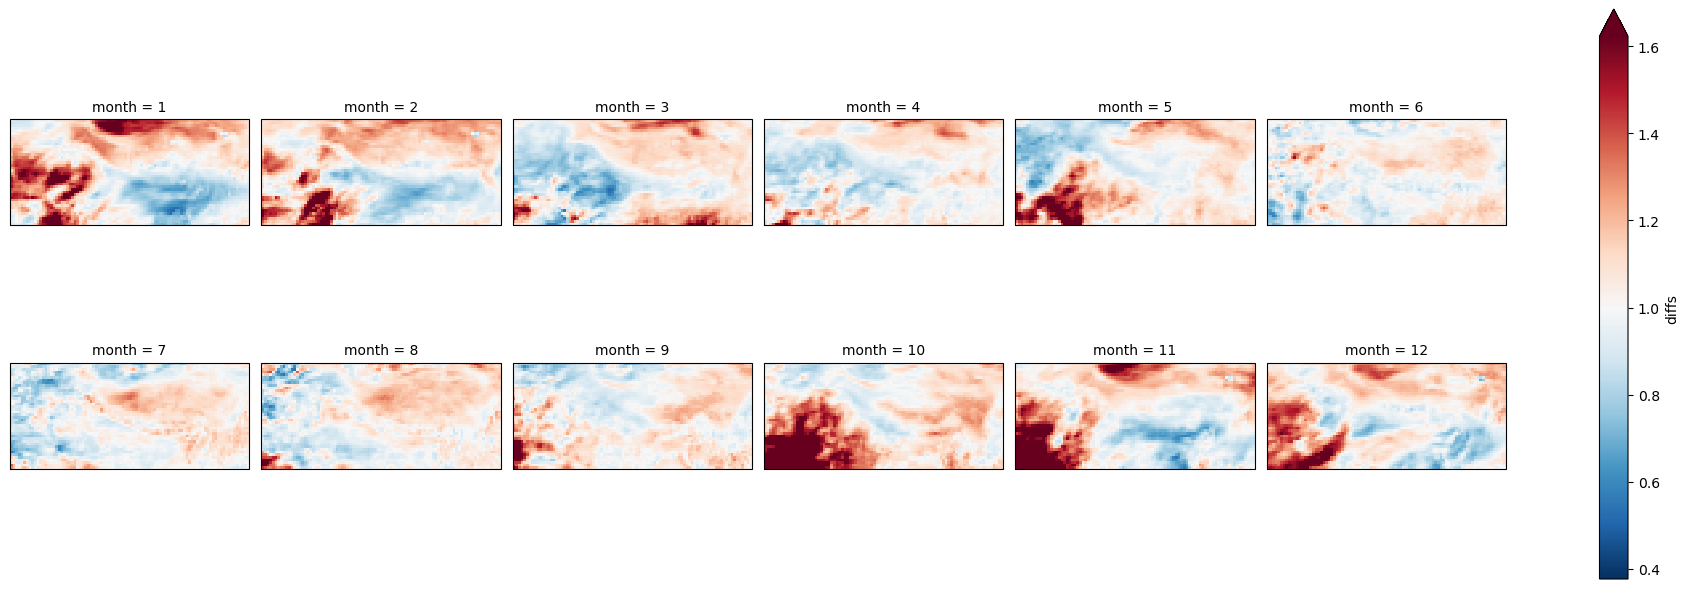

In [637]:
rcp45_rcm_ds = rcp45_rcm_df[['bias', 'diffs']].to_xarray()
proj = ccrs.PlateCarree()
rcp45_rcm_ds['diffs'].plot(col='month', col_wrap=6, cmap='RdBu_r', center=1, robust=True, transform=ccrs.PlateCarree(), subplot_kws={'projection': proj})

In [305]:
rcp85_rcm_list = []

for file in sorted(glob.glob('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/rcp85*95.csv')):
    # Load data
    print(file)
    df = pd.read_csv(file, index_col=0)
    df['time'] = pd.to_datetime(df['time'])
    df['month'] = df['time'].dt.month

    # Aggregate data by month
    agg_df = pd.DataFrame()
    group = df.groupby(['lat', 'lon', 'month'])
    agg_df['mean'] = group.mean()['tp']
    rcp85_rcm_list.append(agg_df)

/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/rcp85_CSIRO_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/rcp85_MIROC_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/rcp85_MPI-REMO2009_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/rcp85_MPI_IITM_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/rcp85_NOAA_SMHI_2066_2095.csv


In [632]:
rcp85_rcm_df = pd.concat(rcp85_rcm_list, axis=1)
rcp85_rcm_df['means']  = rcp85_rcm_df.mean(axis=1)
rcp85_rcm_df['bias'] = rcp85_rcm_df['means'] - hist_rcm_df['means']
rcp85_rcm_df['diffs'] = rcp85_rcm_df['means'] / hist_rcm_df['means']

In [633]:
rcp85_rcm_df

mean      mean      mean      mean      mean  \
lat   lon    month                                                     
20.25 60.25  1      0.404861  0.087439  0.055996  0.809551  0.062735   
             2      0.202096  0.043647  0.068609  0.364108  0.000000   
             3      0.179835  0.038603  0.139970  0.071969  0.002581   
             4      0.429566  0.052111  0.154774  0.221606  0.038499   
             5      0.209012  1.266300  0.280391  0.877511  0.642380   
...                      ...       ...       ...       ...       ...   
39.75 104.75 8      1.122986  1.473955  0.534955  0.943461  1.779697   
             9      0.779749  0.984181  0.236721  0.861433  1.408993   
             10     0.493151  0.402736  0.288200  0.592878  0.325953   
             11     0.453733  0.066222  0.072827  0.393278  0.141953   
             12     0.429137  0.024478  0.089684  0.456015  0.084991   

                       means      bias     diffs  
lat   lon    month                                
20.25 60.25  1      0.284116 -0.026978  0.913280  
             2      0.135692  0.023141  1.205602  
             3      0.086592  0.000518  1.006015  
             4      0.179311 -0.082885  0.683882  
             5      0.655119  0.088329  1.155841  
...                      ...       ...       ...  
39.75 104.75 8      1.171011  0.253192  1.275862  
             9      0.854215  0.231393  1.371524  
             10     0.420583  0.126609  1.430682  
             11     0.225603  0.046654  1.260713  
             12     0.216861  0.041355  1.235636  

[43200 rows x 8 columns]

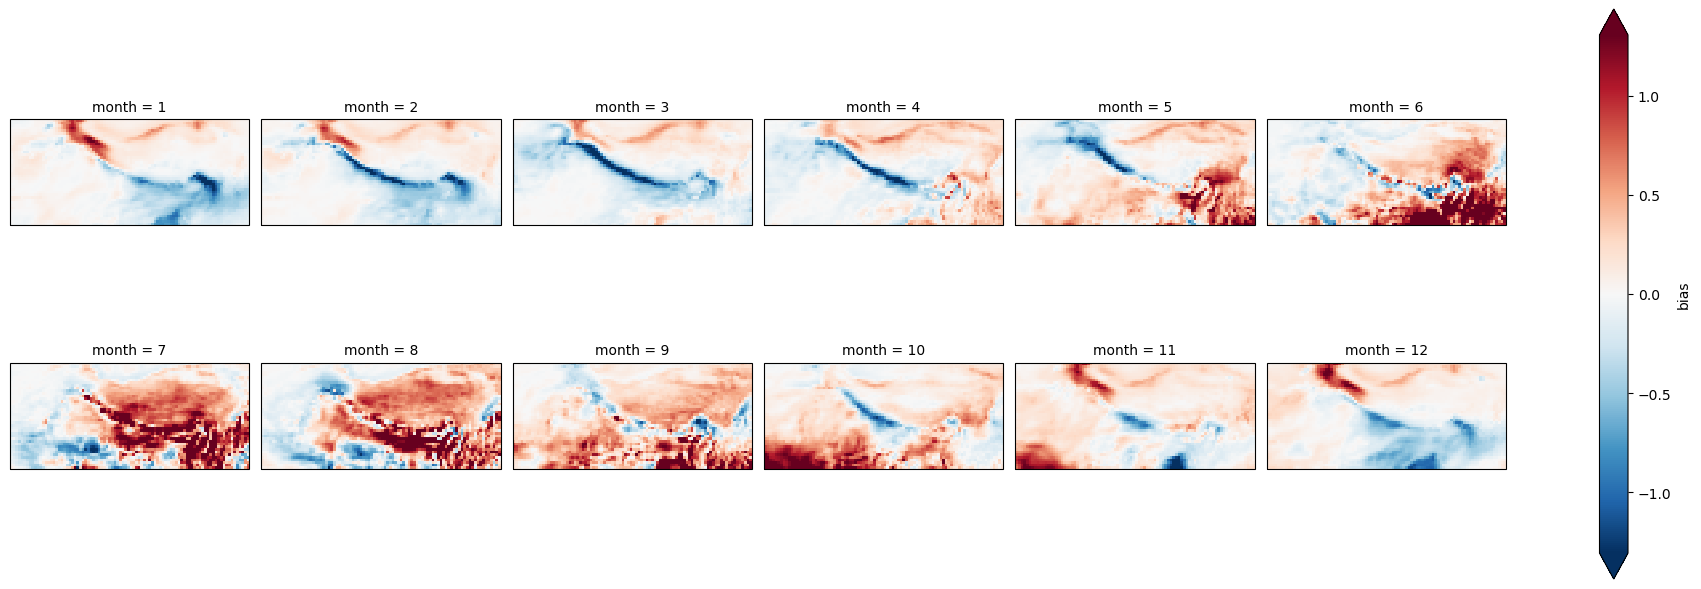

In [727]:
rcp85_rcm_ds = rcp85_rcm_df[['bias','diffs']].to_xarray()
proj = ccrs.PlateCarree()
rcp85_rcm_ds['bias'].plot(col='month', col_wrap=6, cmap='RdBu_r', center=0, robust=True, transform=ccrs.PlateCarree(), subplot_kws={'projection': proj})


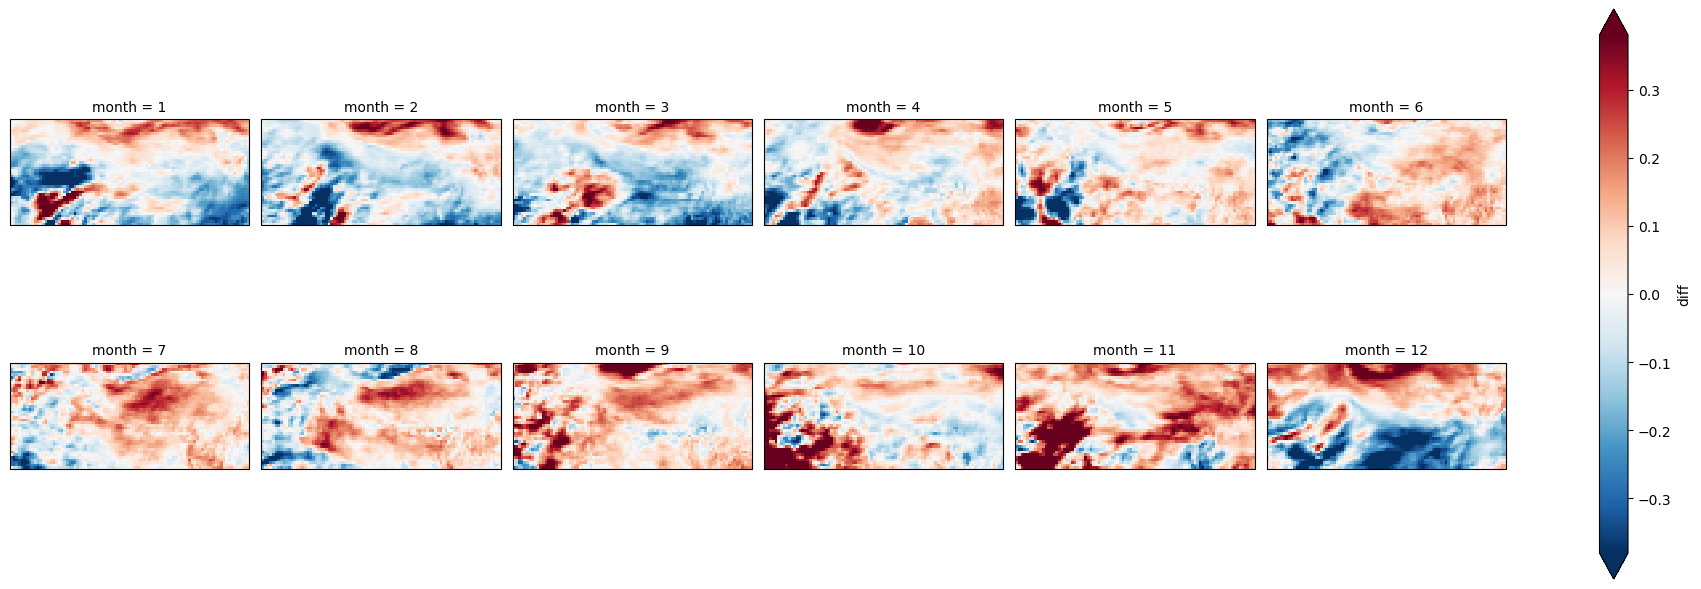

In [309]:
rcp_diff_ds = rcp85_rcm_ds - rcp45_rcm_ds
rcp_diff_ds.plot(col='month', col_wrap=6, cmap='RdBu_r', center=0, robust=True, transform=ccrs.PlateCarree(), subplot_kws={'projection': proj})

# BCM differences

### Historical

In [746]:
hist_bcm_list = []

for file in sorted(glob.glob('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/historical/bcm_historical*2005.csv')):
    # Load data
    print(file)
    tag = file.split('/')[-1][3:-4]
    lmbda = np.load('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/historical/lambda' + tag + '.npy')
    df = pd.read_csv(file, index_col=0)
    y = df['mean'].values.flatten()
    l95 = (df['mean']-1.96*np.sqrt(df['var'])).values.flatten()
    u95 = (df['mean']+1.96*np.sqrt(df['var'])).values.flatten()
    df['mean_tr'] = sp.special.inv_boxcox(y, lmbda)
    df['l95_tr'] = sp.special.inv_boxcox(l95, lmbda)
    df['u95_tr'] = sp.special.inv_boxcox(u95, lmbda)
    df = df.reset_index().set_index(['month', 'lon', 'lat'])
    hist_bcm_list.append(df)

/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/historical/bcm_historical_CSIRO_1976_2005.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/historical/bcm_historical_MIROC_1976_2005.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/historical/bcm_historical_MPI_IITM_1976_2005.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/historical/bcm_historical_MPI_REMO2009_1976_2005.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/historical/bcm_historical_NOAA_SMHI_1976_2005.csv


In [747]:
hist_bcm_df = pd.concat(hist_bcm_list, axis=1)
hist_bcm_df['means']  = hist_bcm_df['mean_tr'].mean(axis=1)
hist_bcm_df['l95s']  = hist_bcm_df['l95_tr'].mean(axis=1)
hist_bcm_df['u95s']  = hist_bcm_df['u95_tr'].mean(axis=1)

### RCP4.5 FF

In [748]:
rcp45_bcm_list = []

for file in sorted(glob.glob('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp45/bcm_rcp45*95.csv')):
    # Load data
    print(file)
    tag = file.split('/')[-1][3:-4]
    lmbda = np.load('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp45/lambda' + tag + '.npy')
    df = pd.read_csv(file, index_col=0)
    y = df['mean'].values.flatten()
    l95 = (df['mean']-1.96*np.sqrt(df['var'])).values.flatten()
    u95 = (df['mean']+1.96*np.sqrt(df['var'])).values.flatten()
    df['mean_tr'] = sp.special.inv_boxcox(y, lmbda)
    df['l95_tr'] = sp.special.inv_boxcox(l95, lmbda)
    df['u95_tr'] = sp.special.inv_boxcox(u95, lmbda)
    df = df.reset_index().set_index(['month', 'lon', 'lat'])
    rcp45_bcm_list.append(df)

/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp45/bcm_rcp45_CSIRO_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp45/bcm_rcp45_MIROC_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp45/bcm_rcp45_MPI_IITM_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp45/bcm_rcp45_MPI_REMO2009_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp45/bcm_rcp45_NOAA_SMHI_2066_2095.csv


In [752]:
rcp45_bcm_df = pd.concat(rcp45_bcm_list, axis=1)
rcp45_bcm_df['means'] = rcp45_bcm_df['mean_tr'].mean(axis=1)
rcp45_bcm_df['l95s']  = rcp45_bcm_df['l95_tr'].mean(axis=1)
rcp45_bcm_df['u95s']  = rcp45_bcm_df['u95_tr'].mean(axis=1)

In [850]:
rcp45_bcm_df['diffs'] = rcp45_bcm_df['u95s'] / hist_bcm_df['u95s']

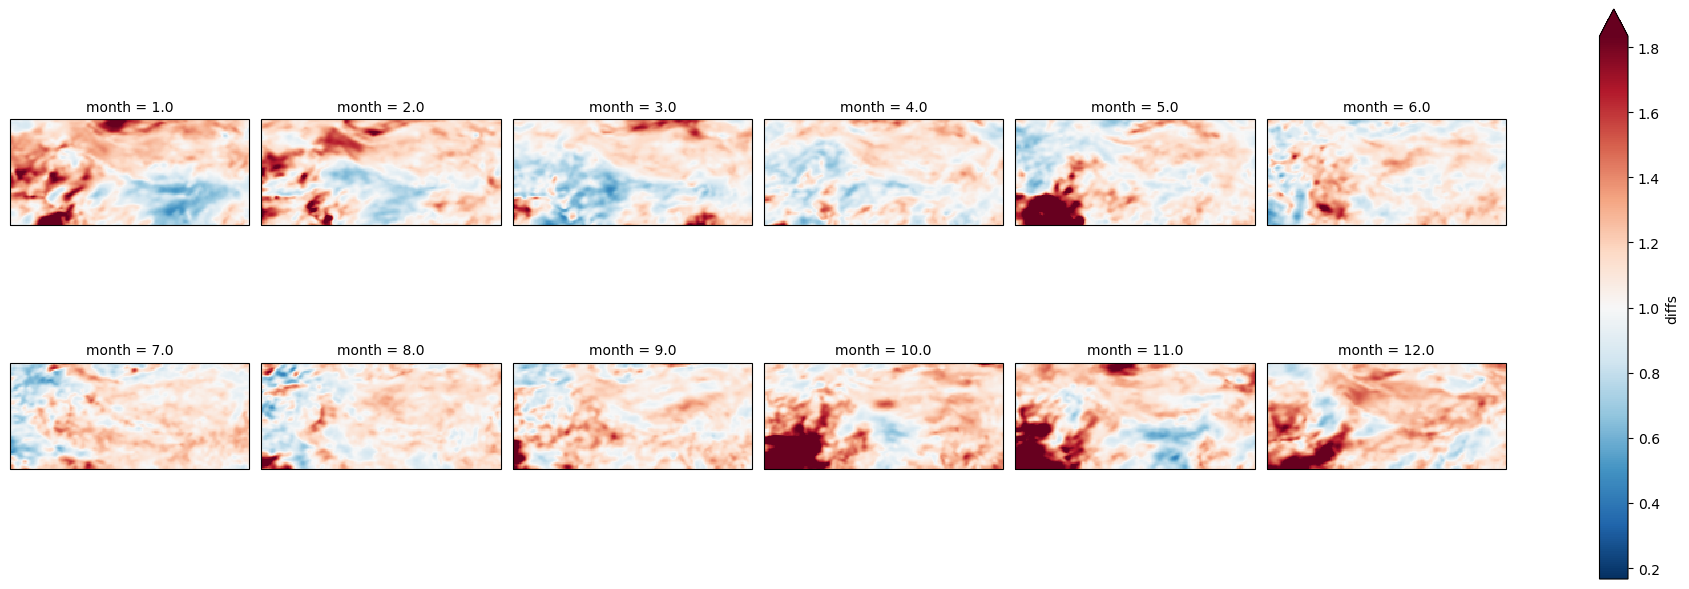

In [852]:
rcp45_bcm_ds = rcp45_bcm_df[['means', 'diffs']].to_xarray()
proj = ccrs.PlateCarree()
rcp45_bcm_ds.diffs.plot(col='month', x='lon', y='lat', col_wrap=6, cmap='RdBu_r', center=1, robust=True, transform=ccrs.PlateCarree(), subplot_kws={'projection': proj})

### RCP8.5 FF

In [762]:
rcp85_bcm_list = []

for file in sorted(glob.glob('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp85/bcm_rcp85*95.csv')):
    # Load data
    print(file)
    tag = file.split('/')[-1][3:-4]
    lmbda = np.load('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp85/lambda' + tag + '.npy')
    df = pd.read_csv(file, index_col=0)
    y = df['mean'].values.flatten()
    l95 = (df['mean']-1.96*np.sqrt(df['var'])).values.flatten()
    u95 = (df['mean']+1.96*np.sqrt(df['var'])).values.flatten()
    df['mean_tr'] = sp.special.inv_boxcox(y, lmbda)
    df['l95_tr'] = sp.special.inv_boxcox(l95, lmbda)
    df['u95_tr'] = sp.special.inv_boxcox(u95, lmbda)
    df = df.reset_index().set_index(['month', 'lon', 'lat'])
    rcp85_bcm_list.append(df)

/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp85/bcm_rcp85_CSIRO_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp85/bcm_rcp85_MIROC_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp85/bcm_rcp85_MPI_IITM_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp85/bcm_rcp85_MPI_REMO2009_2066_2095.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp85/bcm_rcp85_NOAA_SMHI_2066_2095.csv


In [763]:
rcp85_bcm_df = pd.concat(rcp85_bcm_list, axis=1)
rcp85_bcm_df['means']  = rcp85_bcm_df['mean_tr'].mean(axis=1)
rcp85_bcm_df['95s']  = rcp85_bcm_df['l95_tr'].mean(axis=1)
rcp85_bcm_df['u95s']  = rcp85_bcm_df['u95_tr'].mean(axis=1)

In [853]:
rcp85_bcm_df['diffs'] = rcp85_bcm_df['u95s'] / hist_bcm_df['u95s']

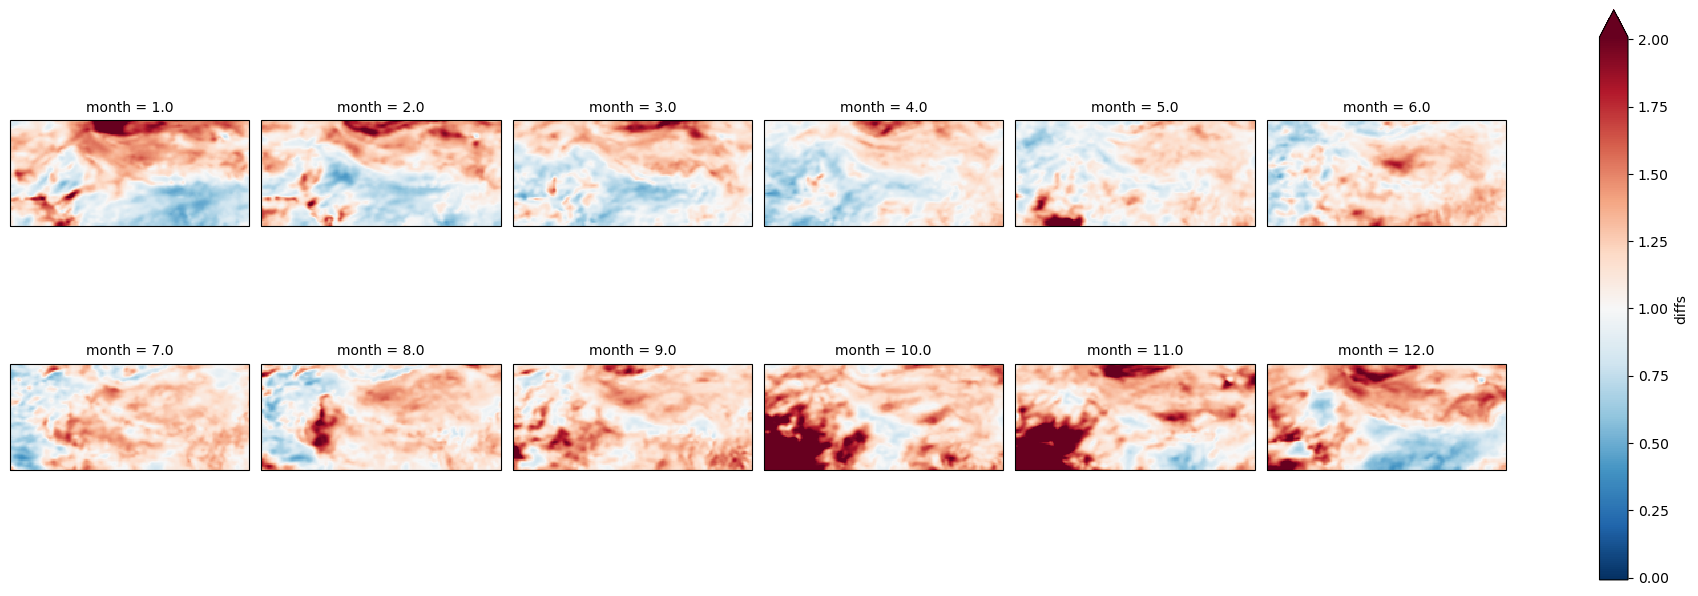

In [854]:
rcp85_bcm_ds = rcp85_bcm_df[['means', 'diffs']].to_xarray()
proj = ccrs.PlateCarree()
rcp85_bcm_ds.diffs.plot(col='month', x='lon', y='lat', col_wrap=6, cmap='RdBu_r', center=1, robust=True, transform=ccrs.PlateCarree(), subplot_kws={'projection': proj})

### RCP4.5 NF

In [648]:
rcp45_nf_bcm_list = []

for file in sorted(glob.glob('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp45/bcm_rcp45*65.csv')):
    # Load data
    print(file)
    tag = file.split('/')[-1][3:-4]
    lmbda = np.load('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp45/lambda' + tag + '.npy')
    df = pd.read_csv(file, index_col=0)
    y = df['mean'].values.flatten()
    df['mean_tr'] = sp.special.inv_boxcox(y, lmbda)
    df = df.reset_index().set_index(['month', 'lon', 'lat'])
    rcp45_nf_bcm_list.append(df)

/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp45/bcm_rcp45_CSIRO_2036_2065.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp45/bcm_rcp45_MIROC_2036_2065.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp45/bcm_rcp45_MPI_IITM_2036_2065.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp45/bcm_rcp45_MPI_REMO2009_2036_2065.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp45/bcm_rcp45_NOAA_SMHI_2036_2065.csv


In [649]:
rcp45_nf_bcm_df = pd.concat(rcp45_nf_bcm_list, axis=1)
rcp45_nf_bcm_df['means']  = rcp45_nf_bcm_df['mean_tr'].mean(axis=1)
rcp45_nf_bcm_df['diffs'] = rcp45_nf_bcm_df['means'] / hist_bcm_df['means']

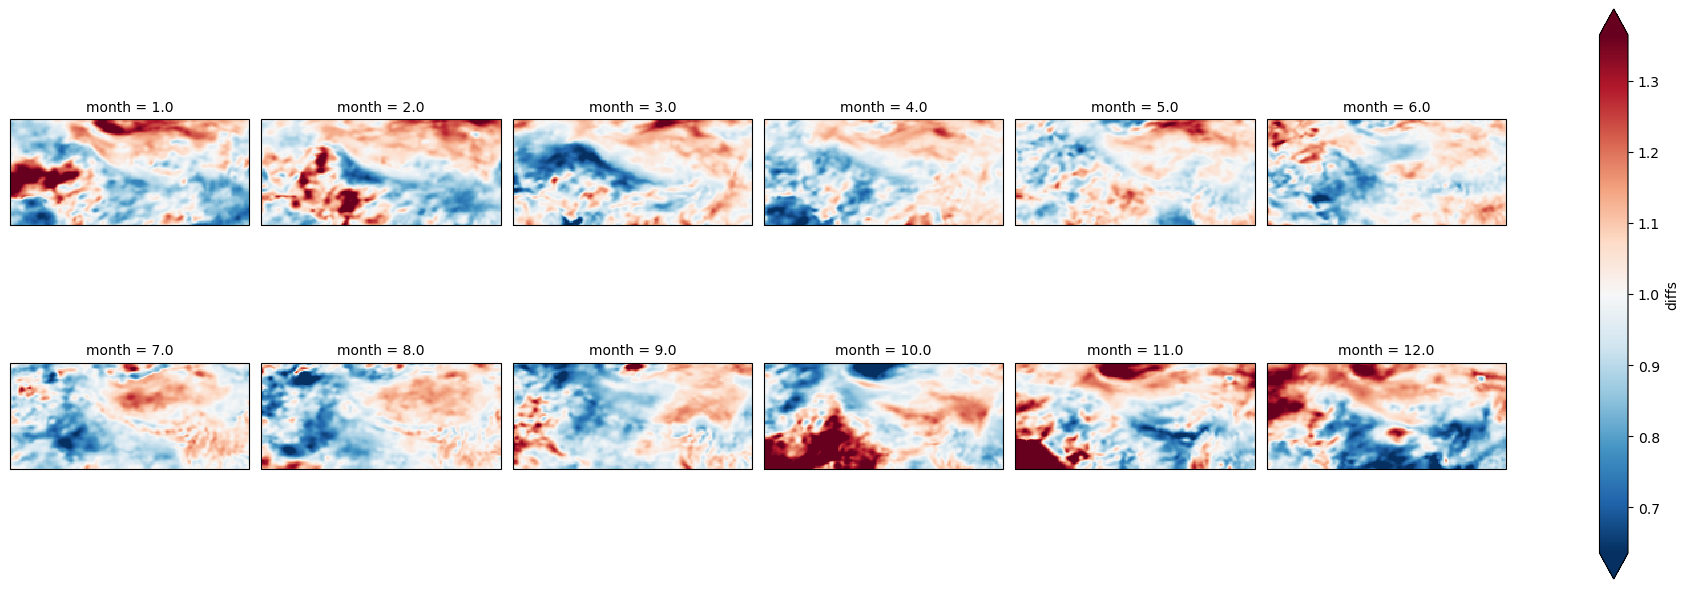

In [650]:
rcp45_nf_bcm_ds = rcp45_nf_bcm_df[['means', 'diffs']].to_xarray()
proj = ccrs.PlateCarree()
rcp45_nf_bcm_ds.diffs.plot(col='month', x='lon', y='lat', col_wrap=6, cmap='RdBu_r', center=1, robust=True, transform=ccrs.PlateCarree(), subplot_kws={'projection': proj})

### RCP8.5 NF

In [653]:
rcp85_nf_bcm_list = []

for file in sorted(glob.glob('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp85/bcm_rcp85*65.csv')):
    # Load data
    print(file)
    tag = file.split('/')[-1][3:-4]
    lmbda = np.load('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp85/lambda' + tag + '.npy')
    df = pd.read_csv(file, index_col=0)
    y = df['mean'].values.flatten()
    df['mean_tr'] = sp.special.inv_boxcox(y, lmbda)
    df = df.reset_index().set_index(['month', 'lon', 'lat'])
    rcp85_nf_bcm_list.append(df)

/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp85/bcm_rcp85_CSIRO_2036_2065.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp85/bcm_rcp85_MIROC_2036_2065.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp85/bcm_rcp85_MPI_IITM_2036_2065.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp85/bcm_rcp85_MPI_REMO2009_2036_2065.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/bcm_outputs/rcp85/bcm_rcp85_NOAA_SMHI_2036_2065.csv


In [655]:
rcp85_nf_bcm_df = pd.concat(rcp85_nf_bcm_list, axis=1)
rcp85_nf_bcm_df['means']  = rcp85_nf_bcm_df['mean_tr'].mean(axis=1)
rcp85_nf_bcm_df['diffs'] = rcp85_nf_bcm_df['means'] / hist_bcm_df['means']

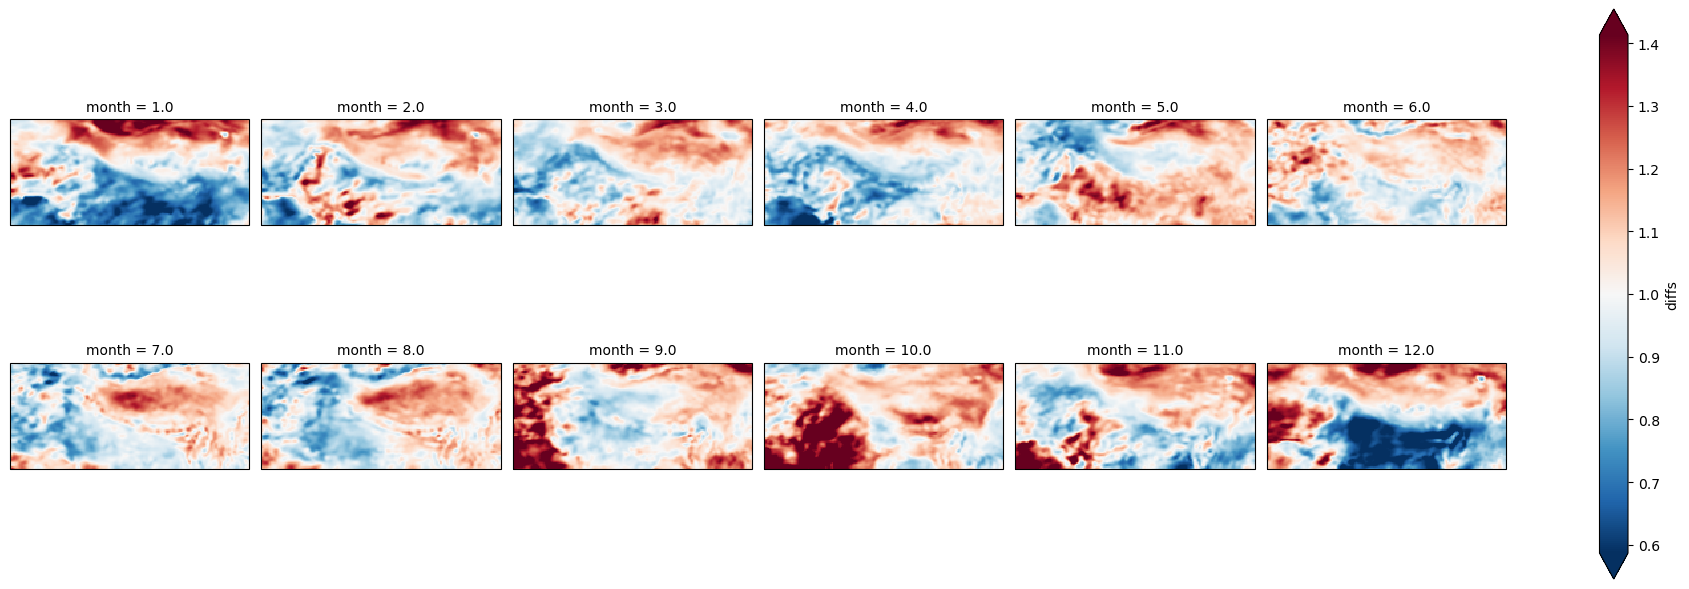

In [656]:
rcp85_nf_bcm_ds = rcp85_nf_bcm_df[['means', 'diffs']].to_xarray()
proj = ccrs.PlateCarree()
rcp85_nf_bcm_ds.diffs.plot(col='month', x='lon', y='lat', col_wrap=6, cmap='RdBu_r', center=1, robust=True, transform=ccrs.PlateCarree(), subplot_kws={'projection': proj})

# MOE

In [544]:
wm = 'inv' #temp

In [545]:
w_list = []

for file in sorted(glob.glob('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/weights/*.csv')):
    # Load data
    print(file)
    df = pd.read_csv(file, index_col=0)
    # format values
    df.sort_values(['month', 'lon', 'lat'], inplace=True)
    wass_arr = df['wass'].values.reshape(12, 180, -1)
    df['inv'] = moe.inverse_weighting(wass_arr).flatten()
    df['temp'] = moe.softmax_weighting(wass_arr).flatten()
    df.set_index(['month', 'lon', 'lat'], inplace=True)
    w_list.append(df)

/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/weights/wass_historical_CSIRO_1976_2005.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/weights/wass_historical_MIROC_1976_2005.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/weights/wass_historical_MPI_IITM_1976_2005.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/weights/wass_historical_MPI_REMO2009_1976_2005.csv
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/weights/wass_historical_NOAA_SMHI_1976_2005.csv


In [546]:
p95_list = []

for file in sorted(glob.glob('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/p95_*.npy')):
    # Load data
    print(file)
    p95 = np.load(file)
    p95_list.append(p95)

/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/p95_CSIRO.npy
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/p95_MIROC.npy
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/p95_MPI_IITM.npy
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/p95_MPI_REMO2009.npy
/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/p95_NOAA_SMHI.npy


In [547]:
aphro_p95 = np.load('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/processed/p95ref_aphro.npy')

### Historical

In [771]:
hist_bcm_list[0]

mean  mean_uvar   var_log       var  var_log_uvar  \
month lon     lat                                                             
1.0   60.125  20.125 -1.613351   0.005074 -1.753631  0.173144      0.025479   
              20.375 -1.677423   0.002637 -1.783882  0.167985      0.015397   
              20.625 -1.729769   0.002594 -1.743638  0.174883      0.015307   
              20.875 -1.771989   0.002523 -1.599052  0.202088      0.015025   
              21.125 -1.811612   0.002520 -1.372840  0.253386      0.015025   
...                        ...        ...       ...       ...           ...   
12.0  104.875 38.875 -0.963809   0.002520 -3.252737  0.038668      0.015025   
              39.125 -0.948294   0.002523 -3.337666  0.035520      0.015025   
              39.375 -0.922037   0.002594 -3.407956  0.033109      0.015307   
              39.625 -0.886856   0.002637 -3.445664  0.031884      0.015397   
              39.875 -0.845673   0.005074 -3.363355  0.034619      0.025479   

                       mean_tr    l95_tr    u95_tr  
month lon     lat                                   
1.0   60.125  20.125  0.142837  0.036177  0.419467  
              20.375  0.129854  0.032689  0.382767  
              20.625  0.119964  0.028487  0.366365  
              20.875  0.112435  0.022974  0.375051  
              21.125  0.105718  0.016725  0.406070  
...                        ...       ...       ...  
12.0  104.875 38.875  0.342963  0.207781  0.540914  
              39.125  0.349598  0.216898  0.540603  
              39.375  0.361062  0.228615  0.548903  
              39.625  0.376892  0.241740  0.566772  
              39.875  0.396123  0.250353  0.603138  

[172800 rows x 8 columns]

In [553]:
moe_hist_df = hist_bcm_list[0].copy()
moe_hist_df.drop(columns=list(moe_hist_df), inplace=True)
moe_hist_df['moe_mean'] = 0

In [855]:
var = 'u95_tr'

for i in range(len(w_list)):
    hist_bcm_list[i].sort_values(['month', 'lon', 'lat'], inplace=True)
    w_list[i].sort_values(['month', 'lon', 'lat'], inplace=True)


for i in range(len(hist_bcm_list[0])):
    values = np.array([hist_bcm_list[0][var].iloc[i],
                       hist_bcm_list[1][var].iloc[i],
                       hist_bcm_list[2][var].iloc[i],
                       hist_bcm_list[3][var].iloc[i],
                       hist_bcm_list[4][var].iloc[i]])
    
    wass_dist = np.array([w_list[0]['wass'].iloc[i],
                         w_list[1]['wass'].iloc[i],
                         w_list[2]['wass'].iloc[i],
                         w_list[3]['wass'].iloc[i],
                         w_list[4]['wass'].iloc[i]])
    
    w_r = moe.inverse_weighting(wass_dist)
    #print(w_r.sum())

    moe_val= ((values/ p95_list * aphro_p95) * w_r).sum()

    moe_hist_df['moe_mean'].iloc[i] = moe_val

In [856]:
hist_moe_ds = moe_hist_df.to_xarray()

In [857]:
hist_moe_ds

<xarray.Dataset>
Dimensions:   (month: 12, lon: 180, lat: 80)
Coordinates:
  * month     (month) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0
  * lon       (lon) float64 60.12 60.38 60.62 60.88 ... 104.1 104.4 104.6 104.9
  * lat       (lat) float64 20.12 20.38 20.62 20.88 ... 39.12 39.38 39.62 39.88
Data variables:
    moe_mean  (month, lon, lat) float64 nan nan nan nan ... 0.3153 0.3262 0.3603

### RCP45 FF

In [858]:
moe_rcp45_df = rcp45_bcm_list[0].copy()
moe_rcp45_df.drop(columns=list(moe_rcp45_df), inplace=True)
moe_rcp45_df['moe_mean'] = 0

In [859]:
var = 'u95_tr'

for i in range(len(w_list)):
    rcp45_bcm_list[i].sort_values(['month', 'lon', 'lat'], inplace=True)
    w_list[i].sort_values(['month', 'lon', 'lat'], inplace=True)


    for i in range(len(rcp45_bcm_list[0])):
        values = np.array([rcp45_bcm_list[0][var].iloc[i],
                            rcp45_bcm_list[1][var].iloc[i],
                            rcp45_bcm_list[2][var].iloc[i],
                            rcp45_bcm_list[3][var].iloc[i],
                            rcp45_bcm_list[4][var].iloc[i]])

        wass_dist = np.array([w_list[0]['wass'].iloc[i],
                                w_list[1]['wass'].iloc[i],
                                w_list[2]['wass'].iloc[i],
                                w_list[3]['wass'].iloc[i],
                                w_list[4]['wass'].iloc[i]])

        w_r = moe.inverse_weighting(wass_dist)
        #print(w_r.sum())

        moe_val= ((values/ p95_list * aphro_p95) * w_r).sum()

        moe_rcp45_df['moe_mean'].iloc[i] = moe_val

In [860]:
rcp45_moe_ds = moe_rcp45_df.to_xarray()

In [861]:
rcp45_moe_ds

<xarray.Dataset>
Dimensions:   (month: 12, lon: 180, lat: 80)
Coordinates:
  * month     (month) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0
  * lon       (lon) float64 60.12 60.38 60.62 60.88 ... 104.1 104.4 104.6 104.9
  * lat       (lat) float64 20.12 20.38 20.62 20.88 ... 39.12 39.38 39.62 39.88
Data variables:
    moe_mean  (month, lon, lat) float64 nan nan nan nan ... 0.453 0.464 0.5023

In [862]:
rcp45_moe_ds['diffs'] = (rcp45_moe_ds['moe_mean'] / hist_moe_ds['moe_mean'])
rcp45_moe_ds['bias'] = rcp45_moe_ds['moe_mean'] - hist_moe_ds['moe_mean']

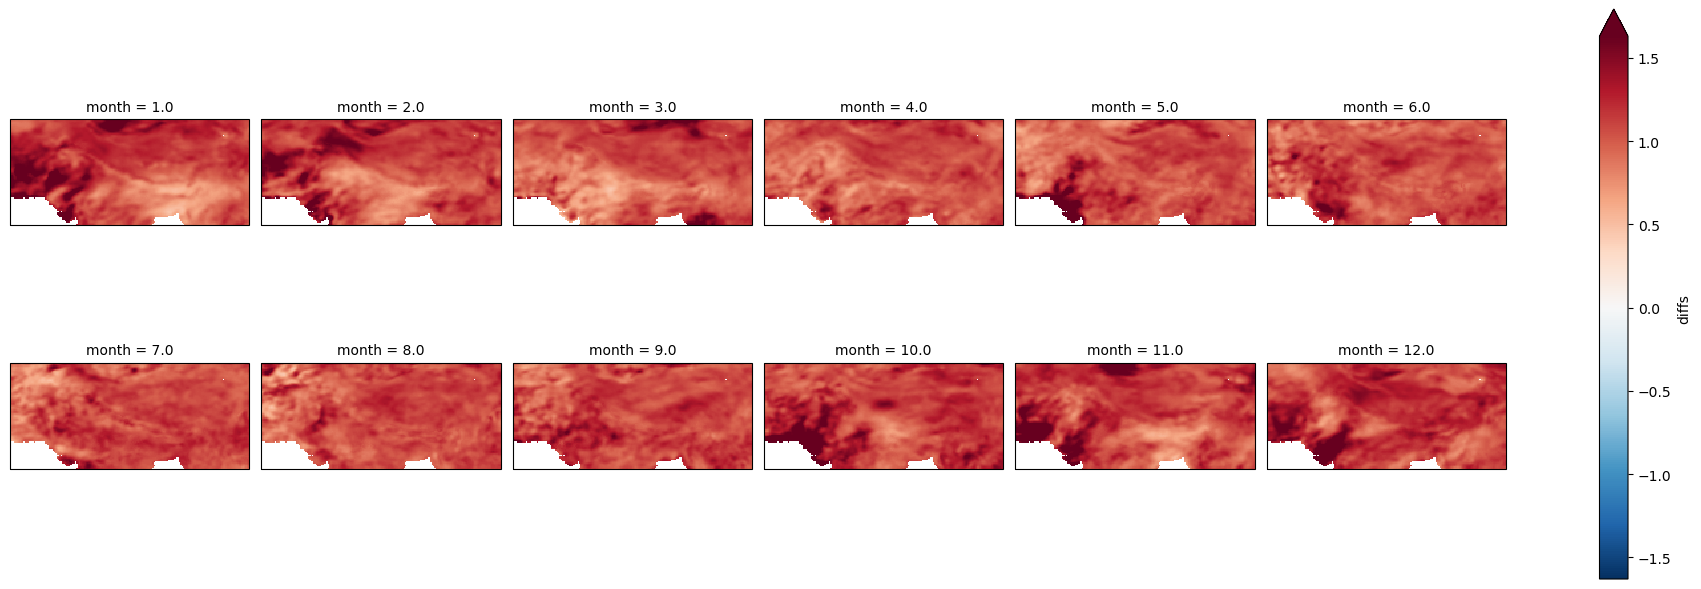

In [863]:
rcp45_moe_ds.diffs.plot(x='lon', y='lat', col='month', col_wrap=6, transform=ccrs.PlateCarree(), center=1, subplot_kws={'projection': proj}, robust=True, cmap='RdBu_r')

### RCP85 FF

In [864]:
moe_rcp85_df = rcp85_bcm_list[0].copy()
moe_rcp85_df.drop(columns=list(moe_rcp85_df), inplace=True)
moe_rcp85_df['moe_mean'] = 0

In [865]:
var = 'u95_tr'

for i in range(len(w_list)):
    rcp85_bcm_list[i].sort_values(['month', 'lon', 'lat'], inplace=True)
    w_list[i].sort_values(['month', 'lon', 'lat'], inplace=True)


for i in range(len(rcp85_bcm_list[0])):
    values = np.array([rcp85_bcm_list[0][var].iloc[i],
                       rcp85_bcm_list[1][var].iloc[i],
                       rcp85_bcm_list[2][var].iloc[i],
                       rcp85_bcm_list[3][var].iloc[i],
                       rcp85_bcm_list[4][var].iloc[i]])
    
    wass_dist = np.array([w_list[0]['wass'].iloc[i],
                         w_list[1]['wass'].iloc[i],
                         w_list[2]['wass'].iloc[i],
                         w_list[3]['wass'].iloc[i],
                         w_list[4]['wass'].iloc[i]])
    
    w_r = moe.inverse_weighting(wass_dist)
    #print(w_r.sum())

    moe_val= ((values/ p95_list * aphro_p95) * w_r).sum()

    moe_rcp85_df['moe_mean'].iloc[i] = moe_val

In [866]:
rcp85_moe_ds = moe_rcp85_df.to_xarray()

In [867]:
rcp85_moe_ds['diffs'] = (rcp85_moe_ds['moe_mean'] / hist_moe_ds['moe_mean'] )
rcp85_moe_ds['bias'] = rcp85_moe_ds['moe_mean'] - hist_moe_ds['moe_mean']

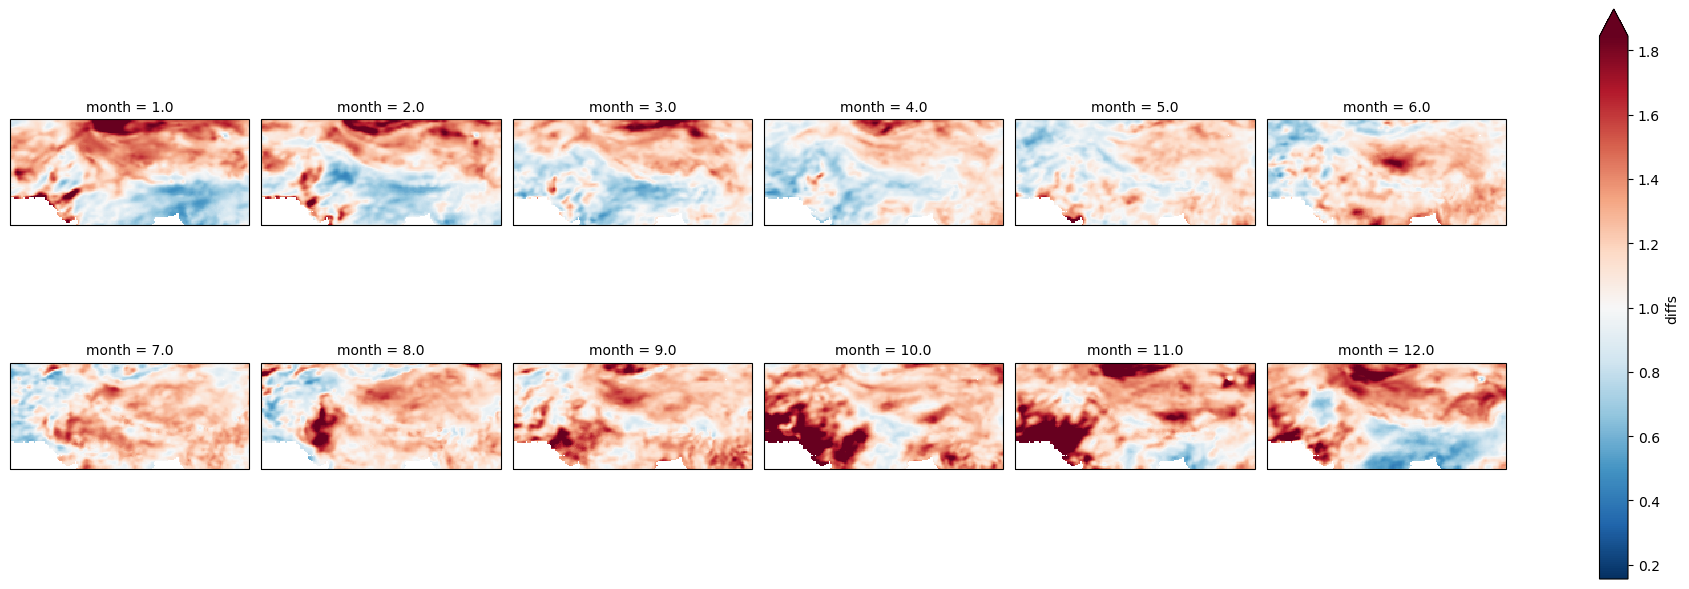

In [881]:
rcp85_moe_ds['diffs'].plot(x='lon', y='lat', col='month', col_wrap=6, cmap='RdBu_r', center=1, robust=True, transform=ccrs.PlateCarree(), subplot_kws={'projection': proj})

In [882]:
rcp85_avg = aplot.seasonal_means(rcp85_moe_ds.diffs, 'diffs')[1:]
rcp45_avg = aplot.seasonal_means(rcp45_moe_ds.diffs, 'diffs')[1:]

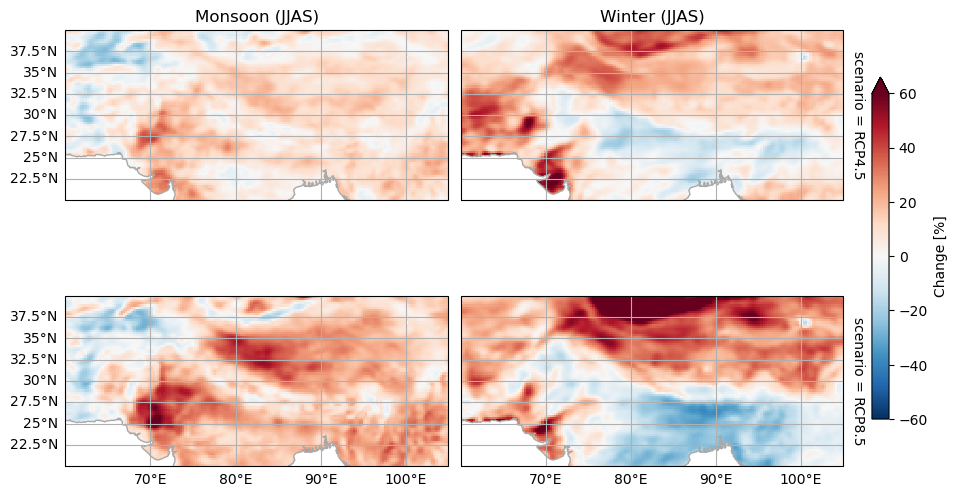

In [895]:
ds_avg_ypred = (xr.concat(
        [rcp45_avg, rcp85_avg], pd.Index(["RCP4.5", "RCP8.5"], name='scenario'))-1)*100

proj = ccrs.PlateCarree()

# Map
ocean_50m = cf.NaturalEarthFeature(
    "physical", "ocean", "50m", edgecolor="darkgrey", facecolor='white')

scenario_fg = ds_avg_ypred.plot(x="lon", y="lat", col="t", row="scenario", aspect=1.5, vmin=-60, vmax=60,
                                cbar_kwargs={"pad": 0.03, 'shrink': 0.6, 'label': 'Change [%]'}, cmap='RdBu_r',
                                subplot_kws={"projection": proj})


for i in range(4):
    ax = scenario_fg.axs.flat[i]
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    if i == 0:
        ax.set_title("Monsoon (JJAS)")
        gl.bottom_labels = False

    if i == 1:
        ax.set_title("Winter (JJAS)")
       
        gl.bottom_labels = False
        gl.left_labels = False
        
    if i == 2:
         ax.set_title(" ")

    if i == 3:
        ax.set_title(" ")
        gl.left_labels = False

    ax.add_feature(ocean_50m)

In [884]:
rcp85_ew_avg = aplot.seasonal_means(rcp85_rcm_ds['diffs'], 'diffs')
rcp45_ew_avg = aplot.seasonal_means(rcp45_rcm_ds['diffs'], 'diffs')

### Differences with equal weights

In [887]:
rcp45_moe_ds['ew_diff'] = (rcp45_moe_ds.diffs - rcp45_bcm_ds.diffs )

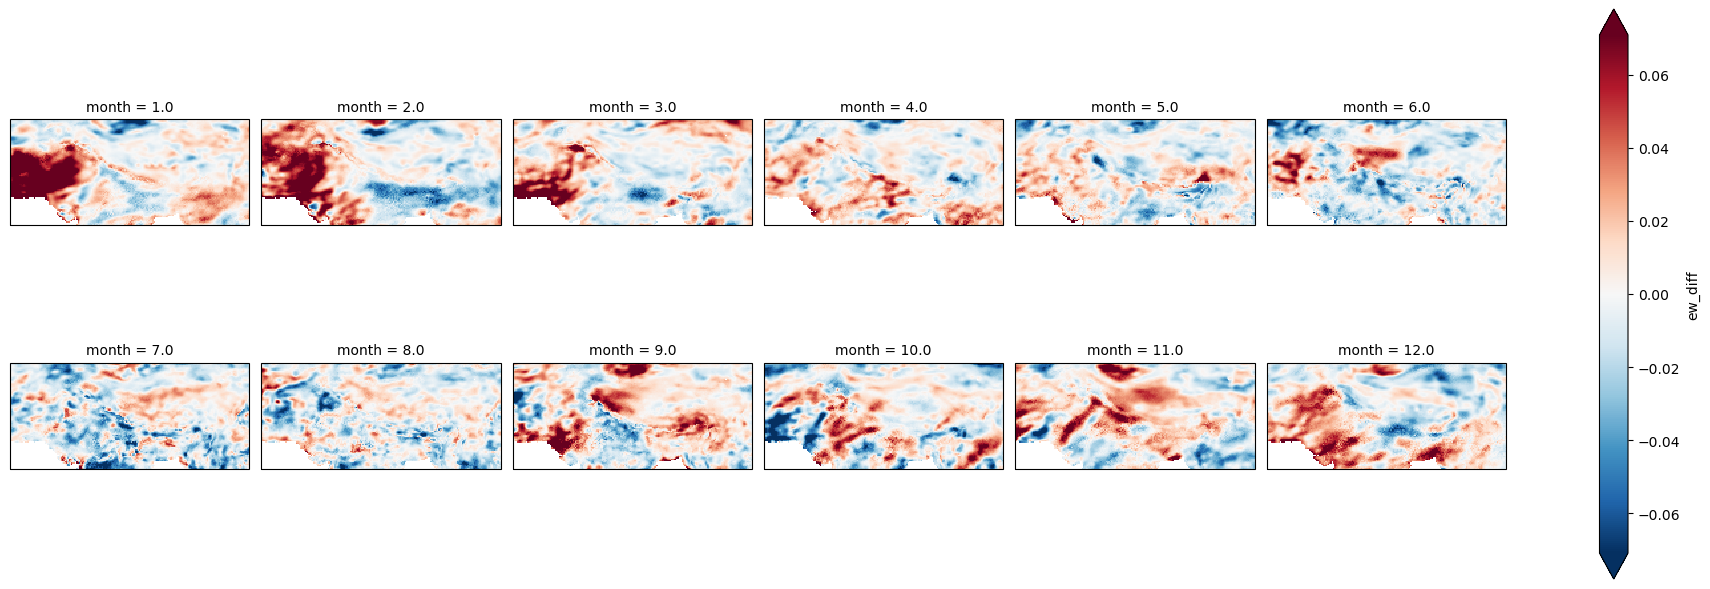

In [888]:
rcp45_moe_ds.ew_diff.plot(x='lon', y='lat', col='month', col_wrap=6, robust=True, transform=ccrs.PlateCarree(), center=0, subplot_kws={'projection': proj}, )

In [889]:
rcp85_moe_ds['ew_diff'] = (rcp85_moe_ds.diffs - rcp85_bcm_ds.diffs )

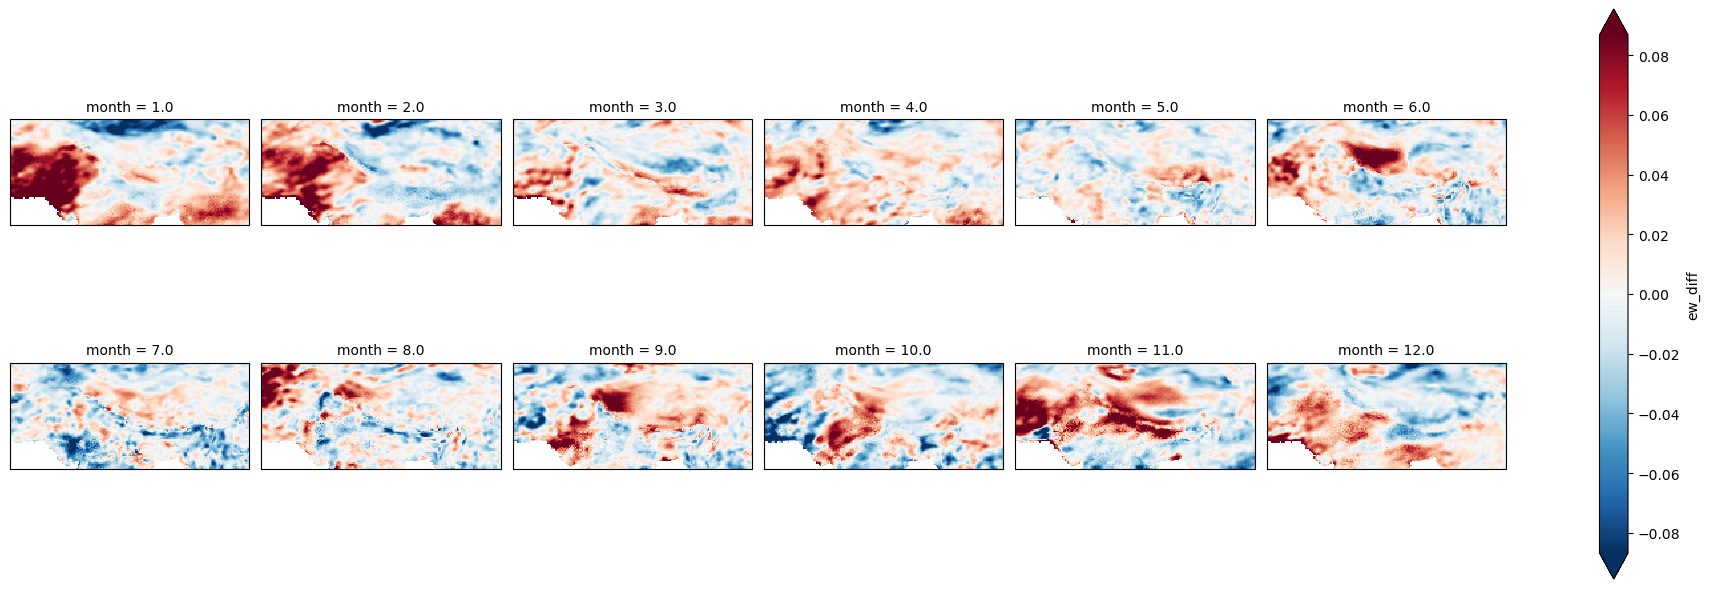

In [890]:
rcp85_moe_ds.ew_diff.plot(x='lon', y='lat', col='month', col_wrap=6, cmap='RdBu_r', center=0, robust=True, transform=ccrs.PlateCarree(), subplot_kws={'projection': proj})

In [893]:
rcp85_ew_avg = aplot.seasonal_means(rcp85_moe_ds.ew_diff, 'ew_diff')[1:] * 100
rcp45_ew_avg = aplot.seasonal_means(rcp45_moe_ds.ew_diff, 'ew_diff')[1:] * 100

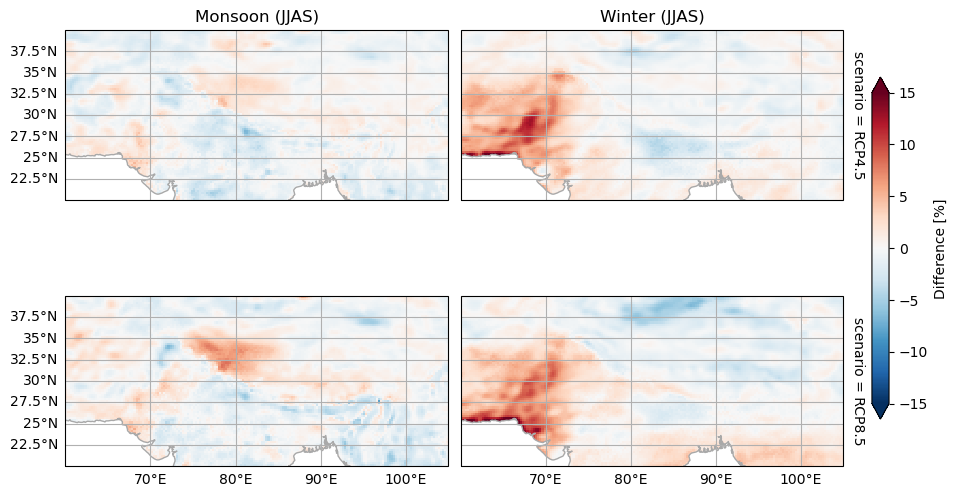

In [894]:
ds_avg_ypred = xr.concat(
        [rcp45_ew_avg, rcp85_ew_avg], pd.Index(["RCP4.5", "RCP8.5"], name='scenario'))

proj = ccrs.PlateCarree()

# Map
ocean_50m = cf.NaturalEarthFeature(
    "physical", "ocean", "50m", edgecolor="darkgrey", facecolor='white')

scenario_fg = ds_avg_ypred.plot(x="lon", y="lat", col="t", row="scenario", aspect=1.5, center=0, vmax=15, vmin=-15, extend='both',
                                cbar_kwargs={"pad": 0.03, 'shrink': 0.6, 'label': 'Difference [%]'}, 
                                subplot_kws={"projection": proj}, cmap='RdBu_r')


for i in range(4):
    ax = scenario_fg.axs.flat[i]
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    if i == 0:
        ax.set_title("Monsoon (JJAS)")
        gl.bottom_labels = False

    if i == 1:
        ax.set_title("Winter (JJAS)")
       
        gl.bottom_labels = False
        gl.left_labels = False
        
    if i == 2:
         ax.set_title(" ")

    if i == 3:
        ax.set_title(" ")
        gl.left_labels = False

    ax.add_feature(ocean_50m)

## CDFs

In [594]:
ff_moe_cdf = pd.DataFrame(data={'historical': moe_hist_df['moe_mean'].values,
                            'RCP4.5': moe_rcp45_df['moe_mean'].values, 
                            'RCP8.5': moe_rcp85_df['moe_mean'].values})

In [468]:
ff_rcm_cdf = pd.DataFrame(data={'historical': hist_bcm_df['means'].values,
                            'RCP4.5': rcp45_bcm_df['means'].values, 
                            'RCP8.5': rcp85_bcm_df['means'].values})

In [596]:
ff_rcp45_diff_df = pd.DataFrame(data={ 'historical': moe_rcp45_df['moe_mean'].values,
                                        'RCP4.5': moe_rcp45_df['moe_mean'].values,
                                      'RCP8.5': rcp45_bcm_df['means'].values,})

In [471]:
ff_rcp45_diff_df = ff_rcp45_diff_df.loc[~(ff_rcp45_diff_df==0).all(axis=1)]
ff_moe_cdf  = ff_moe_cdf.loc[~(ff_moe_cdf==0).all(axis=1)]
ff_rcm_cdf  = ff_rcm_cdf.loc[~(ff_rcm_cdf==0).all(axis=1)]

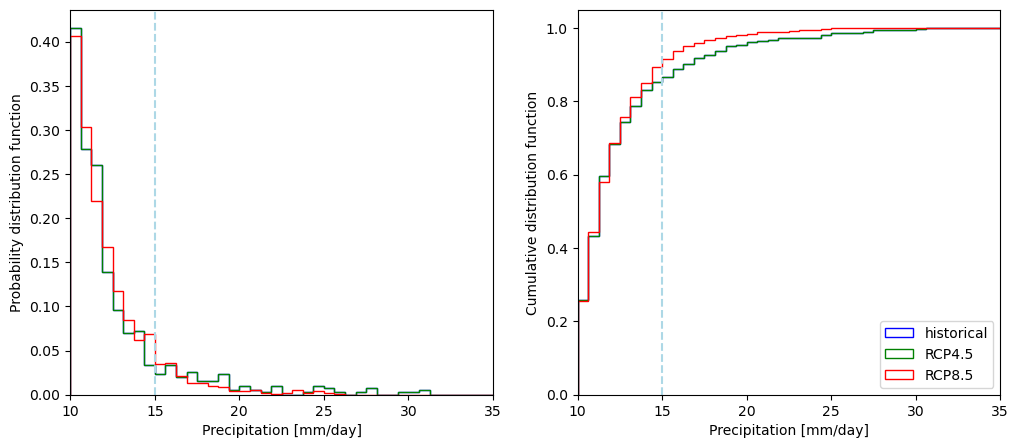

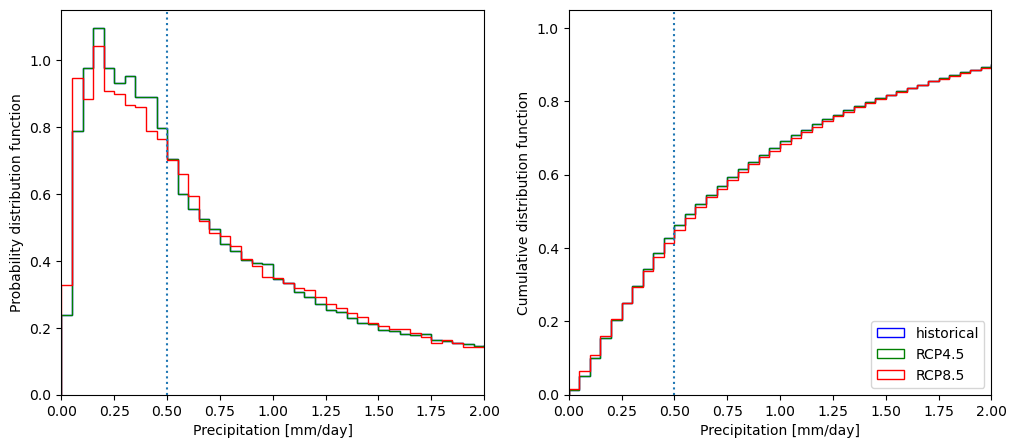

In [597]:
pplot.high_precip(ff_rcp45_diff_df )
plt.savefig('ff_high_precip.pdf', bbox_inches='tight')

pplot.low_precip(ff_rcp45_diff_df )
plt.savefig('ff_low_precip.pdf', bbox_inches='tight')